# Plotting Live Data in RealTime

First to understand how everything works, lets plot using a local static data.

In [1]:
# import packages
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from itertools import count
import random

In [2]:
# data
x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

### A simple static plot

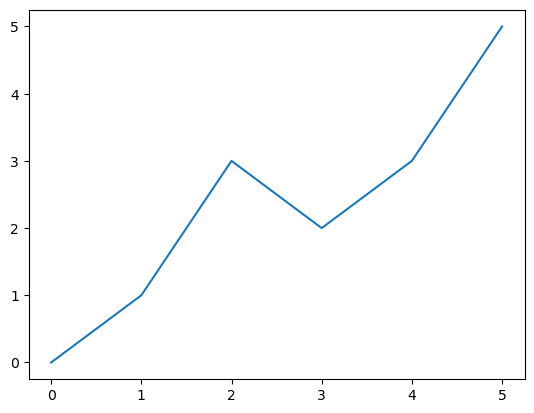

In [3]:
plt.plot(x_vals,y_vals)

This is a simple line plot of a static data, now we have to demonstrate a dynamic data and how that can be used

In [4]:
# Create a count instance 
#(it is a generator that counts up 1 at a time)
index = count()

# set the data to empty list
# data
x_vals = []
y_vals = []

In [5]:
def animate(i):
    """
    This functions add new x values which increment by 1 each time and 
    the creates new y values that is a random integer between 0-5 
    """
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    plt.plot(x_vals,y_vals)

To make use of this function and plot dynamic data we will use the matplotlib animation class `FuncAnimation`

We have to create the class **`FuncAnimation(plt.gcf(),animate,interval)`** where the interval is how frequently to update(in ms), the function to run, and `plt.gcf()` gets the current figure on which to apply this.

<IPython.core.display.Javascript object>


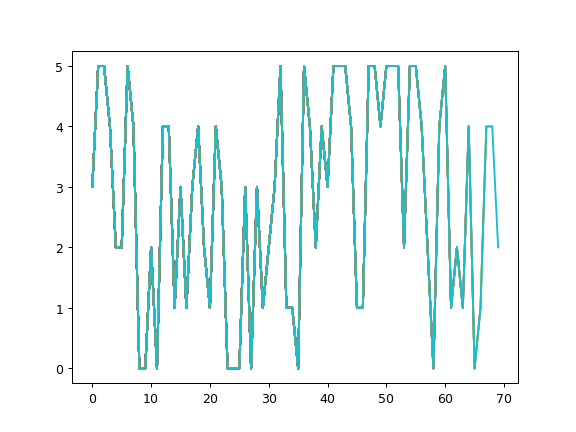

C:\Users\Simon\AppData\Local\Temp\ipykernel_5816\1286223375.py:6: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(plt.gcf(),animate,interval=1000)


In [6]:
# make sure to use this before executing,
# it changes the matplotlib backend from inline which is static to notbook which is dynamic
%matplotlib notebook

# create an instance
anim = FuncAnimation(plt.gcf(),animate,interval=1000)
plt.show()

This works however as you can see the color keeps changing and this is because it is plotting new plots over the old ones instead of replacing them.<br>
To fix this behaviour we have to use the `plt.cla()` before plotting, this clears the axis each time.

In [7]:
def animate(i):
    """
    This functions add new x values which increment by 1 each time and 
    the creates new y values that is a random integer between 0-5 
    """
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    #clear the axis
    plt.cla()
    plt.plot(x_vals,y_vals)

<IPython.core.display.Javascript object>


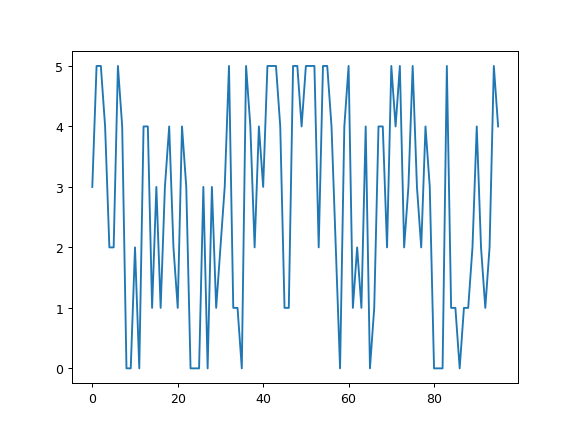

C:\Users\Simon\AppData\Local\Temp\ipykernel_5816\1286223375.py:6: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(plt.gcf(),animate,interval=1000)


In [8]:
# make sure to use this before executing,
# it changes the matplotlib backend from inline which is static to notbook which is dynamic
%matplotlib notebook

# create an instance
anim = FuncAnimation(plt.gcf(),animate,interval=1000)
plt.show()

### Real Time Data 
Usually when working with realtime data either the data is directly used from an API or written to a csv and then loaded.<br>
In this case we will demonstrate writing to a csv and then plotting it.

Note: Checkout the script 'data_gen.py' to see how the csv is updated

In [15]:
def animate(i):
    # read data from csv
    data = pd.read_csv('.\data\data09.csv')
    x = data['x_value']
    # assume these are subsciber count of two YT channels
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend()
    plt.tight_layout()

<IPython.core.display.Javascript object>


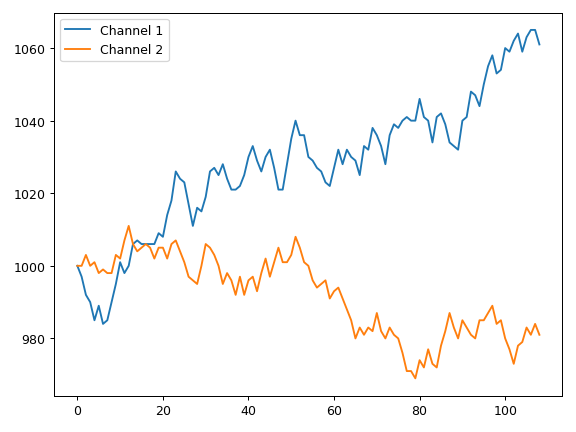

C:\Users\Simon\AppData\Local\Temp\ipykernel_5816\515056320.py:2: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(plt.gcf(),animate,interval=1000)


In [16]:
%matplotlib notebook
anim = FuncAnimation(plt.gcf(),animate,interval=1000)
plt.show()

The above plot keeps updating with the data.

23-11-23<br>
\- Simon Nadar